#**Vid2DensePose by Flode Labs**
Convert your videos easily to Densepose sequences

If you have any problem with the colab let us know via [X.com](https://x.com/flodelabs)

##**Install the libraries**

In [ ]:
!git clone https://github.com/facebookresearch/detectron2.git

Cloning into 'detectron2'...
remote: Enumerating objects: 15737, done.
remote: Counting objects: 100% (460/460), done.
remote: Compressing objects: 100% (334/334), done.
remote: Total 15737 (delta 211), reused 307 (delta 117), pack-reused 15277
Receiving objects: 100% (15737/15737), 6.52 MiB | 11.59 MiB/s, done.
Resolving deltas: 100% (11327/11327), done.


In [ ]:
!pip install torch==2.1.0 torchvision==0.16.0 opencv-python git+https://github.com/facebookresearch/detectron2@main#subdirectory=projects/DensePose

  Cloning https://github.com/facebookresearch/detectron2 (to revision main) to /tmp/pip-req-build-4y12_ri3
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2 /tmp/pip-req-build-4y12_ri3
  Resolved https://github.com/facebookresearch/detectron2 to commit 70f454304e1a38378200459dd2dbca0f0f4a5ab4
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 96.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvi

##**Convert your videos**

Upload the video you want to convert pressing the top left icon on the files section and then especify its name and the output name you desired on the next step.

 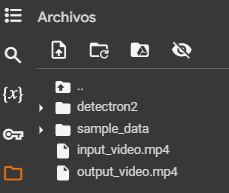

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from detectron2.config import get_cfg
import torch
import cv2
import numpy as np
from detectron2.engine import DefaultPredictor
from densepose import add_densepose_config
from densepose.vis.extractor import DensePoseResultExtractor
from densepose.vis.densepose_results import DensePoseResultsFineSegmentationVisualizer as Visualizer


# Initialize Detectron2 configuration for DensePose
cfg = get_cfg()
add_densepose_config(cfg)
cfg.merge_from_file("detectron2/projects/DensePose/configs/densepose_rcnn_R_50_FPN_s1x.yaml")
cfg.MODEL.WEIGHTS = "https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl"
predictor = DefaultPredictor(cfg)

# Image paths
INPUT_IMAGE_PATH = "/content/drive/MyDrive/3조/이미지파일/모델 333.jpg"
OUTPUT_IMAGE_PATH = "./output_image.jpg"

# Read the input image
input_image = cv2.imread(INPUT_IMAGE_PATH)

# Process the input image
with torch.no_grad():
    outputs = predictor(input_image)['instances']

results = DensePoseResultExtractor()(outputs)
cmap = cv2.COLORMAP_VIRIDIS
arr = cv2.applyColorMap(np.zeros((input_image.shape[0], input_image.shape[1]), dtype=np.uint8), cmap)
output_image = Visualizer(alpha=1, cmap=cmap).visualize(arr, results)

# Save the output image
cv2.imwrite(OUTPUT_IMAGE_PATH, output_image)



True

In [ ]:
from detectron2.config import get_cfg
import torch
import cv2
import numpy as np
from detectron2.engine import DefaultPredictor
from densepose import add_densepose_config
from densepose.vis.extractor import DensePoseResultExtractor
from densepose.vis.densepose_results import DensePoseResultsFineSegmentationVisualizer as Visualizer


# Initialize Detectron2 configuration for DensePose
cfg = get_cfg()
add_densepose_config(cfg)
cfg.merge_from_file("detectron2/projects/DensePose/configs/densepose_rcnn_R_50_FPN_s1x.yaml")
cfg.MODEL.WEIGHTS = "https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl"
predictor = DefaultPredictor(cfg)

In [ ]:
import os

# Ensure the directory for saving results exists
output_dir = "/content/drive/MyDrive/content/image_result/"
os.makedirs(output_dir, exist_ok=True)

# Image paths
for i in range(len(images)):
    INPUT_IMAGE_PATH = f"/content/image/{images[i]}"
    OUTPUT_IMAGE_PATH = os.path.join(output_dir, images[i])  # Output path for saving results

    # Read the input image
    input_image = cv2.imread(INPUT_IMAGE_PATH)

    # Check if the image was successfully loaded
    if input_image is None:
        print(f"Failed to load image: {INPUT_IMAGE_PATH}")
        continue  # Skip processing this image and move to the next one

    # Process the input image
    with torch.no_grad():
        # Convert BGR to RGB if necessary
        input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
        outputs = predictor(input_image_rgb)['instances']

    # Check if instances are found
    if 'instances' in outputs:
        results = DensePoseResultExtractor()(outputs)
        cmap = cv2.COLORMAP_VIRIDIS
        arr = cv2.applyColorMap(np.zeros((input_image.shape[0], input_image.shape[1]), dtype=np.uint8), cmap)
        output_image = Visualizer(alpha=1, cmap=cmap).visualize(arr, results)

        # Save the output image
        cv2.imwrite(OUTPUT_IMAGE_PATH, output_image)
    else:
        print(f"No instances found in image: {INPUT_IMAGE_PATH}")


In [ ]:
from detectron2.config import get_cfg
import torch
import cv2
import numpy as np
from detectron2.engine import DefaultPredictor
from densepose import add_densepose_config
from densepose.vis.extractor import DensePoseResultExtractor
from densepose.vis.densepose_results import DensePoseResultsFineSegmentationVisualizer as Visualizer


# Initialize Detectron2 configuration for DensePose
cfg = get_cfg()
add_densepose_config(cfg)
cfg.merge_from_file("detectron2/projects/DensePose/configs/densepose_rcnn_R_50_FPN_s1x.yaml")
cfg.MODEL.WEIGHTS = "https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl"
predictor = DefaultPredictor(cfg)

for i in list_image:
    # Image paths
    INPUT_IMAGE_PATH = f"/content/drive/MyDrive/3조/weddingdataset/wedding_test/image/{i}"
    OUTPUT_IMAGE_PATH = f"./{i}"

    # Read the input image
    input_image = cv2.imread(INPUT_IMAGE_PATH)

    # Process the input image
    with torch.no_grad():
        outputs = predictor(input_image)['instances']

    results = DensePoseResultExtractor()(outputs)
    cmap = cv2.COLORMAP_VIRIDIS
    arr = cv2.applyColorMap(np.zeros((input_image.shape[0], input_image.shape[1]), dtype=np.uint8), cmap)
    output_image = Visualizer(alpha=1, cmap=cmap).visualize(arr, results)

    # Save the output image
    cv2.imwrite(OUTPUT_IMAGE_PATH, output_image)
